In [ ]:
#!pip3 install PyPDF2 py-readability-metrics

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/db/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/db/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/db/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import PyPDF2

***News Issue -  Harvard University President Claudine Gay facing allegations of plagiarism***

**Deepanshi's Impression -  
In the article by Fox News, it was highlighted that these allegations could be a reason of political propaganda and hence it seems to be showing more of negative side by adding criticism.
In the article by Reuters, they have focused more on the actions taken by Harvard University and Gay to address the issues.I see this as more neutral or a towards a positive side as it is less negative and talks more about the steps taken and how the issue is trying to be solved by Gay and Harvard.**

In [6]:
#4. Use PyPDF2 to extract the text out of each document
def pdftotext(file):
    with open(file, 'rb') as file:
        pdf = PyPDF2.PdfReader(file)
        text = ''
        for page in pdf.pages:
            text += page.extract_text() + ' '  # Appending text from each page
    return text

text1 = pdftotext('foxnews1.pdf')
text2 = pdftotext('reutersnews2.pdf')
print(text1)  # document by fox news
print(text2)  # document by reuters

1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

***#Anomalies Noted***

I noted that for some words, the characters are not considered as 1 word rather got some blankspaces. With this anomoly, we might miss some of the words or also misinterpret some words

In [9]:
#5. Use NLTK to complete sentiment analysis for each of the articles
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Analyzing sentiment for news from each document

score_fox = sentiment.polarity_scores(text1)
print("News 1 by Fox ",score_fox)

score_reuter = sentiment.polarity_scores(text2)
print("News 2 by Reuters ", score_reuter)

News 1 by Fox  {'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}
News 2 by Reuters  {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


***a. Compare the results from the two articles***

The news article by FoxNews has 6.4% of the text which is rated as negative, 86.3% as neutral and 7.3% as positive.
The compound score shows that the article is overall having a positive sentiment.
The news article by Reuters has 7% of the text which is rated as negative, 90.4% as neutral and 2.6% as positive.
The compound score shows that the article is overall having a a strongly negative sentiment.

***b. Compare the results to your reading of the articles; do you agree with the outcome?***

It is suprising to me to see the results of this sentiment analysis as I interpreted these articles in a different way. It seems like the sentiment analyser has come to this conclusion based on the way the words are framed and what kind of words are used.
It seems like even if the overall convent was a bit harsh in FoxNews, the way they have presented it with language puts them in a positive segment criteria.
I somewhere do not agree with the outcome becuase of the analyser taking decision by considering sentiments individually for each word rather than making sense of the whole article.

In [44]:
#6.Sentiment analysis on the article Subheadlines


text1_h="Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
text2_h="Harvard president will submit dissertation edits after plagiarism allegations"


from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Analyzing sentiment for news from each document

score_fox = sentiment.polarity_scores(text1_h)
print("News 1 by Fox ",score_fox)

score_reuter = sentiment.polarity_scores(text2_h)
print("News 2 by Reuters ", score_reuter)

News 1 by Fox  {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
News 2 by Reuters  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


***Interpretation***

As per headlines, it seems that Fox news article clearly demonstrates more negative sentiments. It is interesting to see that Rueters came out to have neutral sentiments which is ideal case for news.

I feel yes this resonates with the actual sentiments as I read both the articles and Fox seem to be more negative while Reuters talks about the action items so more neutral.

In [29]:
#ROUGH WORK Sentiment analysis on the article Subheadlines
import re
def find_capitals(text):
    text_b=' '
    caps =  re.findall(r'\b[A-Z]+\b', text)
    text_b=text_b.join(caps)
    return text_b


text1_h=find_capitals(text1)
text2_h=find_capitals(text2)

print ("fox" , text1_h)

print ("reuters" , text2_h)

from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Analyzing sentiment for news from each document

score_fox = sentiment.polarity_scores(text1_h)
print("News 1 by Fox ",score_fox)

score_reuter = sentiment.polarity_scores(text2_h)
print("News 2 by Reuters ", score_reuter)

fox EST T HAR VARD BOARD ST ANDS BY EMBA TTLED PRESIDENT CLAUDINE GA Y ADMITS INADEQUA TE CIT ATION IN SOME WRITINGS W D C D LEADER DEFENDS HAR VARD PRESIDENT CLAUDINE GA Y SAYS CRITICS ARE ADV ANCING A WHITE SUPREMACIST AGENDA NAACP HAR VARD STUDENT SA YS THE DECISION T O KEEP THE PRESIDENT IS P ART OF A REALL Y LARGE T OXIC CUL TURE ON CAMPUS CLICK HERE T O GET THE FOX NEWS APP FOX T NFL
reuters W U S REUTERS Y D W U S T U S A Y COVID A B A Y
News 1 by Fox  {'neg': 0.032, 'neu': 0.913, 'pos': 0.054, 'compound': 0.128}
News 2 by Reuters  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [43]:
#7. 2-3 different readability scores using py-readability-metrics
from readability import Readability

r = Readability(text1)
#fk = r.flesch_kincaid()
cli = r.coleman_liau()
ari = r.ari()
liwr= r.linsear_write()
print("FOX NEWS",  cli.score, ari.score,liwr.score)


r2 = Readability(text2)
#fk2 = r2.flesch_kincaid()
cli2 = r2.coleman_liau()
ari2 = r2.ari()
liwr2= r2.linsear_write()

# Print readability scores for the first text
print("REUTERS" , cli2.score, ari2.score,liwr2.score)

FOX NEWS 13.410706836616448 21.36114766486977 26.847826086956523
REUTERS 15.188426763110304 19.525234076753065 22.75


***a. Discuss what the chosen metric is measuring***

***coleman_liau()*** - this metric predicts the US school grade level needed to comprehend the text based on characters in words or sentences.

***ari()*** - It is a metric to calculate the US grade level required to grasp the text based on characters but interprets word and sentence complecity basis that. More the value more challenging it is to read.

***linsear_write()*** - 
It is a metric to calculate a score based on no. of easy words and difficult words considering syllables in mind. It estimates the the grade level required for comprehension.


***b. Compare the scores from both articles***
As per Coleman Liau Index, the Reuters article is written at a slightly higher grade level compared to the Fox News article, indicating it might use longer or more complex words.
As per ARI, both articles are written for a high school graduate level or above, but the Fox News article is slightly more complex in terms of sentence/word length.
As per Linsear Write Formula, it is understood that these are written at a college graduate level or even higher. The score for the Fox News article is higher than that of the Reuters article, again proving that it use more complex sentences and also uses multiple syllables.

These scores demonstrates that both the articles are a bit complex to be understood by school students and not meant for general audience but for individuals above the age group 16 years. In addition to this, they would need higher education for a person to read these articles. It could be because both the articles focuses on a similar news and as per news type and information it is challenging. In terms of complexity and readability, there is a little difference in two articles. It seems to be more challenging for someone to read Fox News article than to read the Reuters article as it is using more of complex and long words and sentences.

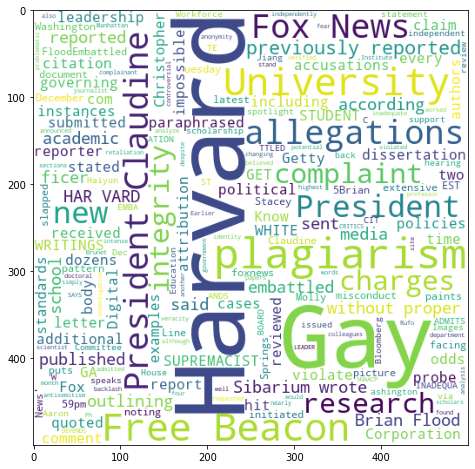

In [56]:
#8. Word Clouds for FOX article
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the first document
wordcloud1 = WordCloud(
    width = 500, height = 500, 
    background_color ='white', 
    stopwords = set(nltk.corpus.stopwords.words('english'))
).generate(text1)

# Plot the word cloud
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud1)
plt.show()

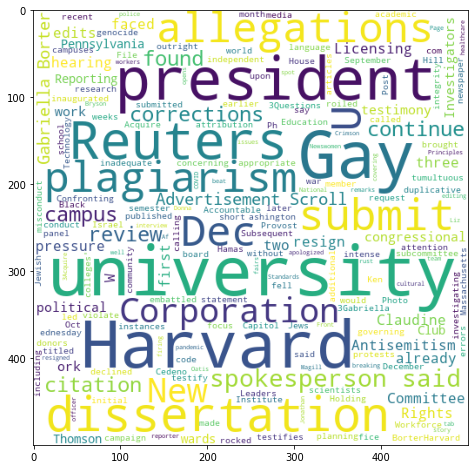

In [57]:
#8. Word Clouds for REUTERS article
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the first document
wordcloud2 = WordCloud(
    width = 500, height = 500,
    background_color ='white', 
    stopwords = set(nltk.corpus.stopwords.words('english'))
).generate(text2)

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud2)
plt.show()

***Comment on the word clouds***

It could be seen that as per word cloud for both the articles, their focus has been on repeating the name of their news channel i.e. Fox and Reuters respectively. Additionally as the news is about harvard university and president Gay, their names have been used a lot of times highlighting the main point of article. Both article has plagarism in it which highlights that both article talks about a similar problem associated with the subject.

Some of the unique words in the 2 word clouds are as follows -

1 Fox News Article - Free Beacon, research, charges, complaint, integrity

2 Reuters News Article - dissertation, dec, new, corporation

The presence of words like charges and complaint in a bigger font in fox news articles showcase that it highlights more of those emotions in the overall article and highlights more criticism.
It interesting to see that in Fox News the words - Free Beacon is highlighted as having high frequency which means someone the news data is built more from free beacon.